<img style="float: right;" src="files/EHT.jpg" width="100" height="100">

## Importar datos en formato .csv con Python

Para explicar en manera general, estos son los pasos más comunes a seguir en un proyecto de machine learning:
    1. Recolectar datos, analizar la naturaleza del problema
    2. Procesar los datos
    3. Selección y entrenamiento de los modelos
    4. Evaluar los resultados
    5. Mejorar el modelo
    
El dataset que se usará en este ejemplo se llama Pima Indians Diabetes, en el que se encuentran datos de mujeres con diabetes y mujeres sin diabetes. En el siguiente [enlace de Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database) se encuentra una descripción más a detalle del origen de este conjunto de datos.

Para importar los datos se usa la librería Pandas, la cual importa los datos en una estructura de datos llamada DataFrame, en la [página de Pandas](https://pandas.pydata.org/docs/getting_started/index.html) se encuentra una descripción básica de como trabajar con los DataFrame.

### Importar datos

Primero se debe importar la librería, el comando "as" hace que el nombre de la librería se cambie y sea el que se usa en las funciones de dicha librería. Esto se hace generalmente para reducir la cantidad de caractéres que se van a utilizar a programar.

In [2]:
# importar librería pandas
import pandas as pd

En la siguiente línea de código en lugar de utilizar la forma nativa pandas.read_csv, se utiliza pd.read_csv. El primer argumento es el nombre del archivo .csv donde se encuentran los datos, el siguiente argumento es para omitir algún encabezado que venga en el archivo original.

In [3]:
# importar los datos como dataframe
dataset = pd.read_csv('pima-indians-diabetes.csv', header=None)

Después se utiliza el método columns para darle nombre a las columnas y sea fácil identificar la información con la que estamos trabajando. Con el método shape podemos ver la cantidad de filas (registros) y columnas (atributos) del conjunto de datos.

In [6]:
dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP",
                   "SkinThick", "TwoHourSerIns", "BMI",
                   "DiPedFunc", "Age", "HasDiabetes"]

# tamaño del dataframe
dataset.shape

(768, 9)

El método head permite ver las primeras filas del conjunto de datos. Esto permite analizar los valores y rangos de números con los que estaremos trabajando.

In [6]:
# vistazo de las primera filas del dataframe
dataset.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Con el método corr podemos generar una matriz de correlación. Esto ayuda a saber que variables se comportan de manera similar dentro del conjunto de datos, en esta [página](https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/item-analysis/interpret-the-results/all-statistics-and-graphs/) se encuentra una descripción detallada de como interpretar la correlación.

In [9]:
# matriz de correlación
corr = dataset.corr()
corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Con la librería [Seaborn](https://seaborn.pydata.org) tenemos la oportunida de ver la matriz de correlación de manera gráfica.

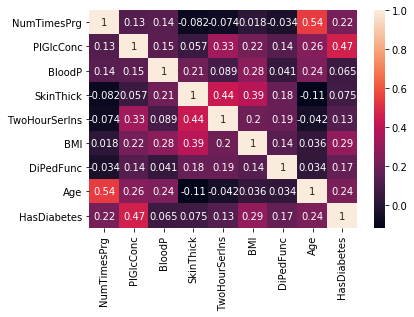

In [10]:
# graficar matriz de correlación
import seaborn as sns
sns.heatmap(corr, annot = True)

La librería [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) es una de las más utilizadas para hacer distintos tipos de gráficos. En esta ocasión se usará para hacer un histograma de cada columna (atributo) para ver su distribución. También nos permite identificar datos faltantes que en este caso están como ceros (también se pueden encontrar como NaN, que significa Not a Number), aquí los podemos identificar porque hay variables como por el ejemplo el BMI (índice de masa corporal) que no pueden tener valor cero. De esta manera el siguiente paso será trabajar esos datos faltantes.

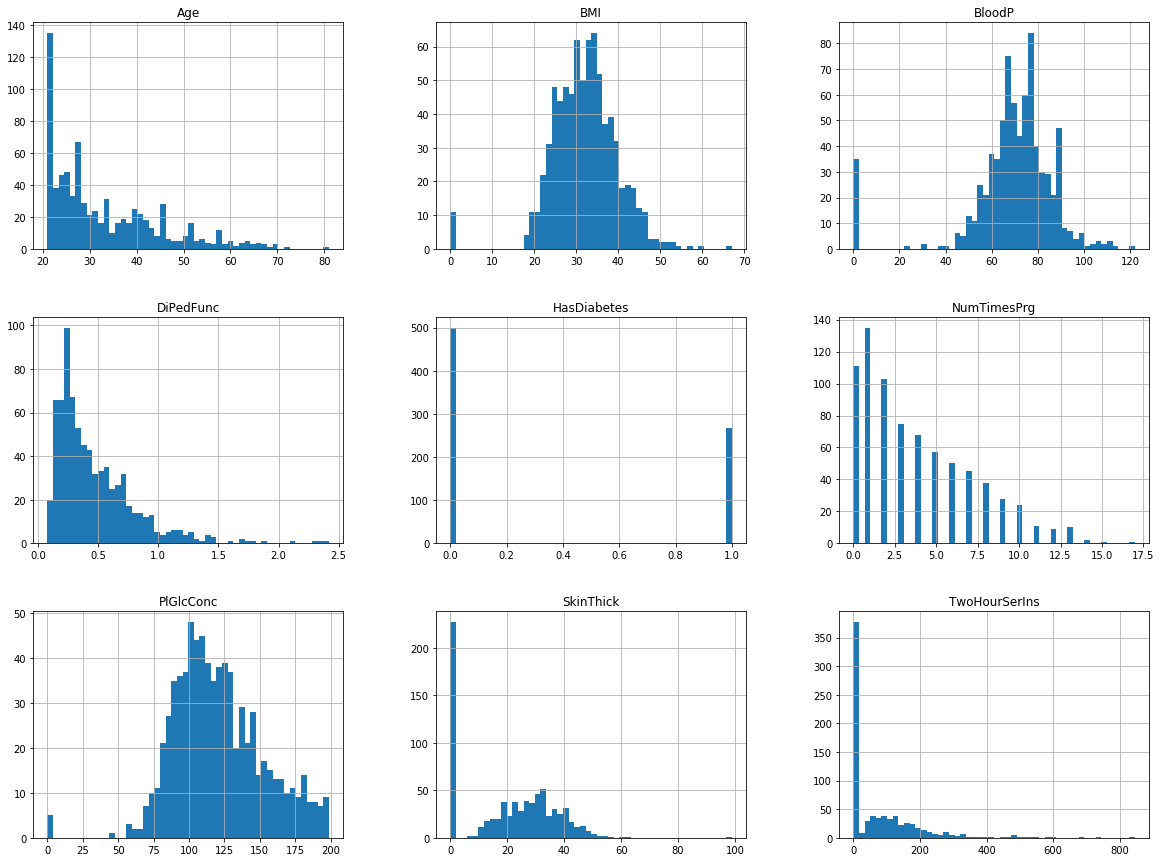

In [12]:
# visualizar los datos
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

### Trabajar datos faltantes (missing data)

Para trabajar datos faltan tenemos varias opciones. Si tenemos una cantidad muy grande de datos podemos eliminar todas las filas que contienen algún dato faltante, generalmente se puede hacer si no se reducirá en más del 80-60%. Otra opción es cambiar esos datos por alguna métrica estadística de dicha columna como puede ser la media, mediana o la moda. En está [nota de TowardsDataScience](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4) se encuentra una buena expliación sobre como manejar los datos faltantes.

En este caso vamos a cambiar los ceros por la mediana. Para eso primero vamos a calcular la mediana de la columna con el método median. Después usamos el método replace para cambiar los ceros por el resultados del cálculo de la mediana.

In [14]:
# calcular la mediana para BMI
median_bmi = dataset['BMI'].median()

dataset['BMI'] = dataset['BMI'].replace(
    to_replace=0, value=median_bmi)

# calcular la mediana para BloodP
median_bloodp = dataset['BloodP'].median()

dataset['BloodP'] = dataset['BloodP'].replace(
    to_replace=0, value=median_bloodp)

# calcular la mediana para PlGlcConc
median_plglcconc = dataset['PlGlcConc'].median()

dataset['PlGlcConc'] = dataset['PlGlcConc'].replace(
    to_replace=0, value=median_plglcconc)

# calcular la mediana para SkinThick
median_skinthick = dataset['SkinThick'].median()

dataset['SkinThick'] = dataset['SkinThick'].replace(
    to_replace=0, value=median_skinthick)

# calcular la mediana para TwoHourSerIns
median_twohourserins = dataset['TwoHourSerIns'].median()

dataset['TwoHourSerIns'] = dataset['TwoHourSerIns'].replace(
    to_replace=0, value=median_twohourserins)

Por último volvemos a generar el histograma de las variables para ver que se hizo el cambio de los datos faltantes de manera correcta. 

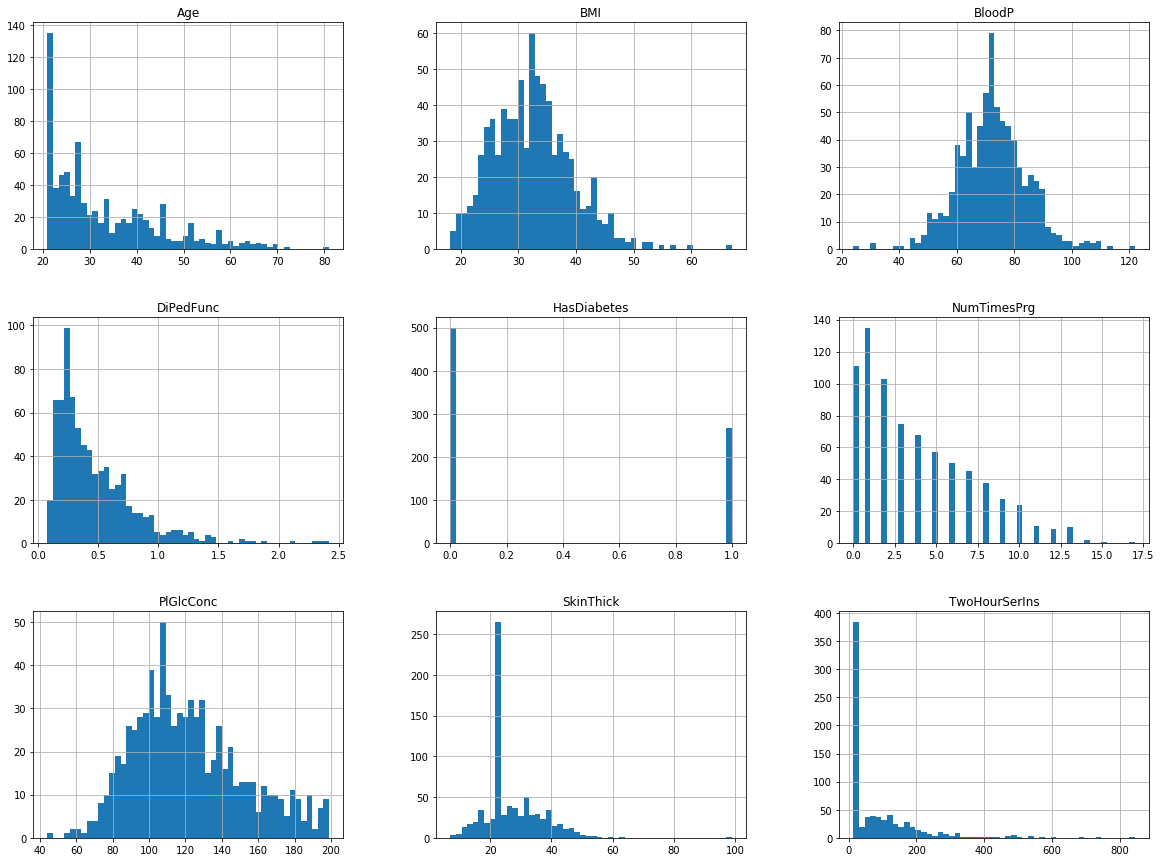

In [19]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()